In [1]:
from google.colab import files
uploaded = files.upload()


Saving oasis_longitudinal.csv to oasis_longitudinal.csv


In [2]:
import pandas as pd

# Replace 'yourfile.csv' with your actual filename after upload
df = pd.read_csv('oasis_longitudinal.csv')

# See the first few rows
df.head()


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
# Display all column names
print(df.columns.tolist())

# Quick info summary
df.info()

# See some descriptive stats
df.describe(include='all').transpose()


['Subject ID', 'MRI ID', 'Group', 'Visit', 'MR Delay', 'M/F', 'Hand', 'Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Subject ID,373,150,OAS2_0073,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MRI ID,373,373,OAS2_0186_MR3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Group,373,3,Nondemented,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Visit,373.0,NaN,NaN,NaN,1.882038,0.922843,1.0,1.0,2.0,2.0,5.0
MR Delay,373.0,NaN,NaN,NaN,595.104558,635.485118,0.0,0.0,552.0,873.0,2639.0
M/F,373,2,F,213,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hand,373,1,R,373,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,373.0,NaN,NaN,NaN,77.013405,7.640957,60.0,71.0,77.0,82.0,98.0
EDUC,373.0,NaN,NaN,NaN,14.597855,2.876339,6.0,12.0,15.0,16.0,23.0
SES,354.0,NaN,NaN,NaN,2.460452,1.134005,1.0,2.0,2.0,3.0,5.0


In [4]:
# Number of unique participants
print("Unique subjects:", df['Subject ID'].nunique())

# Check how many visits per person
df['Visit'].value_counts().sort_index()


Unique subjects: 150


,count
Visit,
1,150
2,144
3,58
4,15
5,6


In [5]:
# Clean dataset
df = df.copy()

# Fill missing SES and MMSE with median
df['SES'] = df['SES'].fillna(df['SES'].median())
df['MMSE'] = df['MMSE'].fillna(df['MMSE'].median())

# Encode categorical columns
df['M/F'] = df['M/F'].map({'M':0, 'F':1})
df['Group'] = df['Group'].map({'Nondemented':0, 'Converted':1, 'Demented':2})

# Drop IDs and Hand (not useful for ML)
features = ['Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF','M/F','MR Delay']
X = df[features]
y = df['Group']


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.86      1.00      0.93        38
           1       1.00      0.12      0.22         8
           2       0.97      1.00      0.98        29

    accuracy                           0.91        75
   macro avg       0.94      0.71      0.71        75
weighted avg       0.92      0.91      0.87        75

[[38  0  0]
 [ 6  1  1]
 [ 0  0 29]]


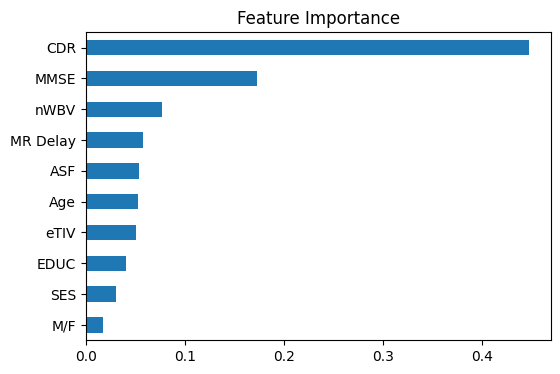

In [7]:
import matplotlib.pyplot as plt

importances = pd.Series(clf.feature_importances_, index=features)
importances.sort_values().plot(kind='barh', figsize=(6,4))
plt.title('Feature Importance')
plt.show()


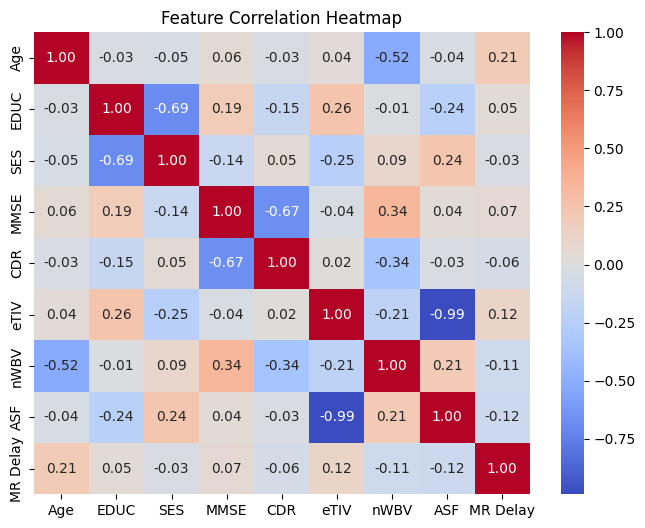

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[['Age','EDUC','SES','MMSE','CDR','eTIV','nWBV','ASF','MR Delay']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


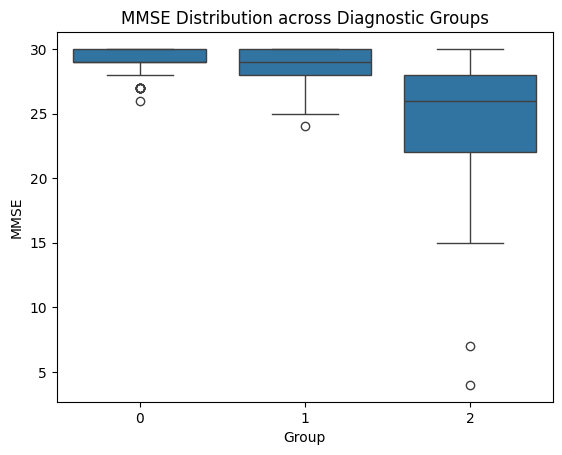

In [9]:
sns.boxplot(x='Group', y='MMSE', data=df)
plt.title('MMSE Distribution across Diagnostic Groups')
plt.show()


In [10]:
from scipy.stats import f_oneway

groups = [df[df['Group']==i]['MMSE'] for i in df['Group'].unique()]
stat, p = f_oneway(*groups)
print("ANOVA F-statistic:", stat, "p-value:", p)


ANOVA F-statistic: 108.52999446597856 p-value: 8.148164217479977e-38


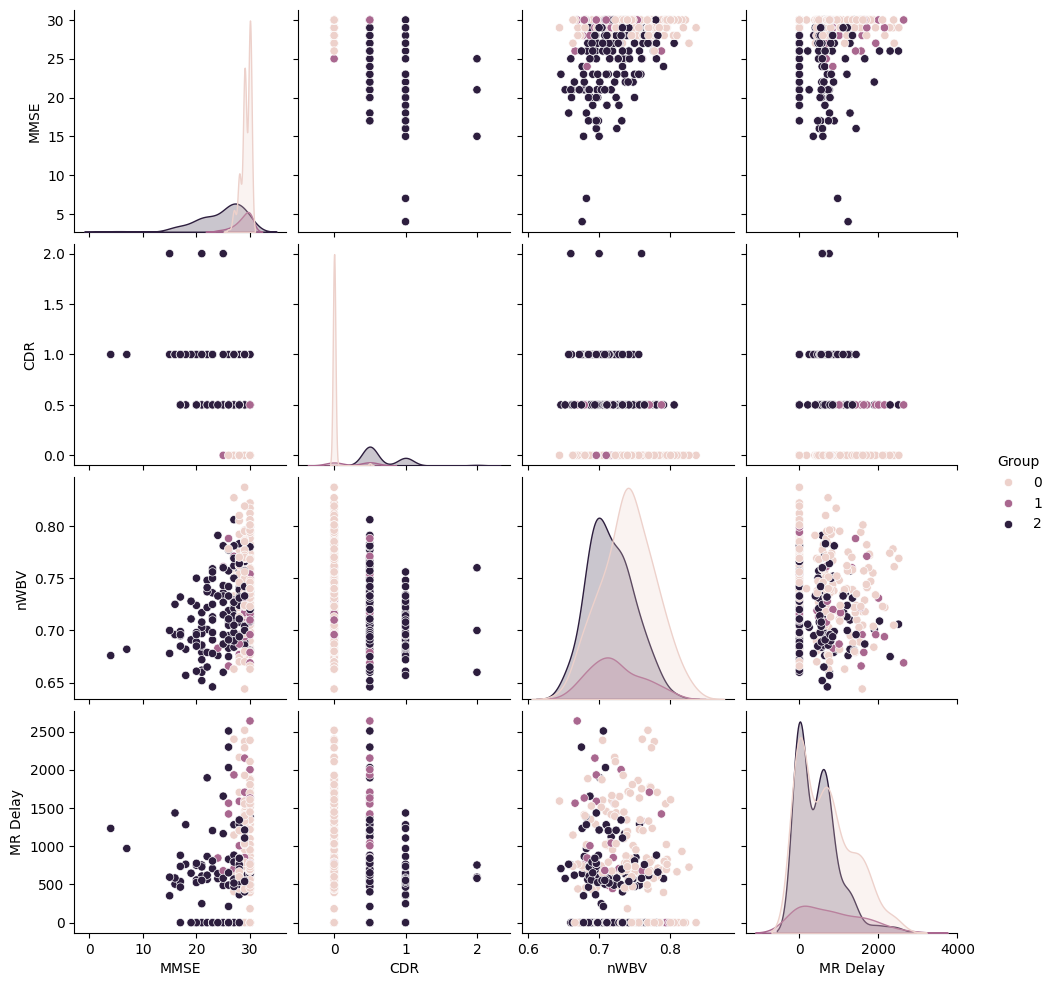

In [11]:
sns.pairplot(df[['MMSE','CDR','nWBV','MR Delay','Group']], hue='Group')
